Use the pytorchfinal env for this 

%pylab inline

In [30]:
from facelib import FaceDetector, AgeGenderEstimator

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mplt

In [90]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.patches as patches
import os
import random

# importing pandas as pd  
import pandas as pd  
from IPython.display import clear_output
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [33]:
face_detector = FaceDetector(confidence_threshold=0.7)
age_gender_detector = AgeGenderEstimator()


from FaceDetector: weights loaded
from AgeGenderEstimator: weights loaded


In [34]:
fontPath = "C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode\\ufonts.com_times-new-roman-[copy-1].ttf"
font =  ImageFont.truetype (fontPath, 16 )


In [35]:
path = "C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode\\posts"

I use image 108 in mette as an example of where the process works well and image 308 as an example of where it does not

In [36]:
impath = path + "\\mette\\" + "pic_308.jpeg"

In [37]:
image = mplt.imread(impath)

In [38]:
image = np.array(image)


In [39]:

faces, boxes, scores, landmarks = face_detector.detect_align(image)


In [40]:
np.array(scores)[0][0]

0.97053176

In [41]:
img_pil = Image.fromarray(np.array(image))
img = ImageDraw.Draw(img_pil) 
genders, ages = age_gender_detector.detect(faces)


for i in range(len(faces)): 
    img.rectangle(np.array(boxes)[i],outline= "red")
    img.text(xy = (np.array(boxes)[i][0],np.array(boxes)[i][1] - 15),
             #text = str(np.array(scores)[i][0]),
             text = genders[i],
             font= font,
            fill = "white")

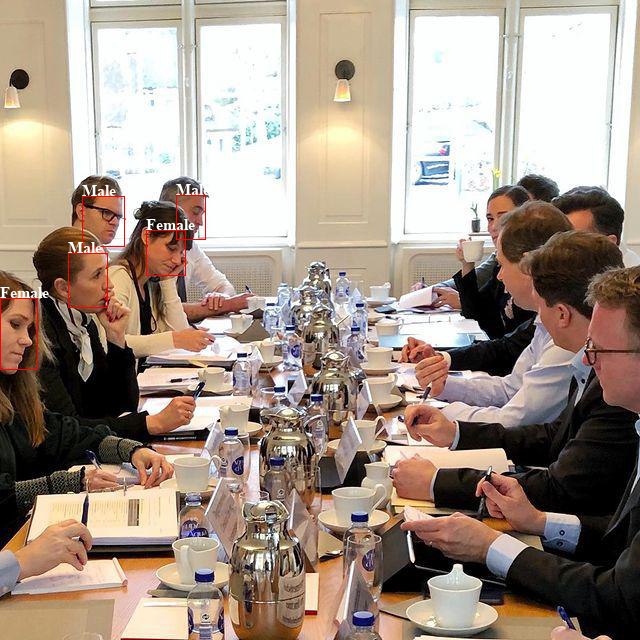

In [42]:
img_pil

In [43]:
print("there are",len(faces), "faces detected")

there are 5 faces detected


In [44]:
genders, ages = age_gender_detector.detect(faces)
print(genders, ages)

['Male', 'Male', 'Female', 'Male', 'Female'] [26, 35, 24, 30, 30]


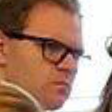

Gender: Male


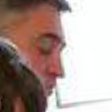

Gender: Male


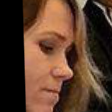

Gender: Female


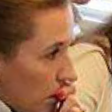

Gender: Male


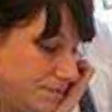

Gender: Female


In [45]:
for i in range(len(faces)): 
    display(Image.fromarray(np.array(faces[i])))
    print("Gender:",genders[i])

# I make an input loop to create the hand coded labels. 
It takes 500 random images, and outputs 1 random face from that image - this image i then code 

In [46]:
path = "C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode\\posts"

In [47]:
face_list = []
gender_list = []
paths_list = []

In [48]:
random.seed(420)
i = 0
while i < 500:
    
    int_1 = random.randint(0,len(os.listdir(path))-1)
    
    impath = path + "\\"+ os.listdir(path)[int_1]+"\\" 
    int_2 = random.randint(4,len(os.listdir(impath))-1)
    impath = impath + os.listdir(impath)[int_2]
    #print(impath)
    
    try:
        image = mplt.imread(impath)
    except:
        continue
    image = np.array(image)
    
    faces, boxes, scores, landmarks = face_detector.detect_align(image)
    if len(faces) == 0:
        continue

    else:
        if impath not in paths_list:
            paths_list.append(impath)
        else:
            continue
        
        genders, ages = age_gender_detector.detect(faces)
            


        #img_pil = Image.fromarray(np.array(image))
        #img = ImageDraw.Draw(img_pil) 


        int_face = random.randint(0,len(faces)-1)
        face = faces[int_face]
        img.rectangle(np.array(boxes)[int_face],outline= "red")
        img.text(xy = (np.array(boxes)[int_face][0],np.array(boxes)[int_face][1] - 15),
                 text = genders[int_face],
                 font= font,
                fill = "white")
        #display(Image.fromarray(np.array(faces[int_face])))
        #print("Gender:",genders[int_face])
    
        face_list.append(face)
        gender_list.append(genders[int_face])
        
        i += 1

In [49]:
len(face_list)

500

In [50]:
len(gender_list)

500

In [51]:
len(paths_list)

500

In [59]:
 # dictionary of lists  
dict1 = {'face':face_list, 'gender': gender_list, 'paths':paths_list}  
       
df1 = pd.DataFrame(dict1) 
    
# saving the dataframe 
#df.to_csv('face_gender_handcode_nocode.csv') 

In [106]:
#hand_code = []
#i = 0
#for face in face_list:
  #  display(Image.fromarray(np.array(face)))
  #  x = input()
   # hand_code.append(x)
    #clear_output(wait=True)
   # print(str(round(i / len(face_list) ,2)*100) + "%")
   # i += 1

100.0%


In [60]:
dict2 = pd.read_csv('face_gender_handcode.csv')
hand_code = dict2['handcode_gender']
paths_list2 = dict2['paths']

In [79]:
 # dictionary of lists  
dict2 = {'face':face_list, 'gender': gender_list,'handcode_gender': hand_code, 'paths':paths_list}  
       
df2 = pd.DataFrame(dict2) 
    
# saving the dataframe 


In [69]:
df2.to_csv('face_gender_handcode1.csv') 

In [70]:
dict3 = pd.read_csv('face_gender_handcode.csv')

In [71]:
#face_list = dict3['face']
hand_code = dict3['handcode_gender']

# Calcualte 

In [83]:
handcode = dict2['handcode_gender']
gender = dict2['gender']

In [86]:
handcode = ["Female" if x=="f" else "Male" for x in handcode]

In [99]:
handcode_binary = [1 if x=="Female" else 0 for x in handcode]
gender_binary = [1 if x=="Female" else 0 for x in gender]

In [100]:
precision_score(gender_binary, handcode_binary)

0.8064516129032258

In [101]:
recall_score(gender_binary, handcode_binary)

0.8583690987124464

In [102]:
accuracy_score(gender_binary, handcode_binary)

0.838

In [103]:
f1_score(gender_binary, handcode_binary)

0.8316008316008315

# Here i read in the dict and recode the faces

In [29]:
hand_code_again = []
i = 0
for code in hand_code:
    display(Image.fromarray(np.array(face_list[i])))
    print("I have coded this as:", hand_code[i],"\nRecode if nessesary, else leave as is.")
    x = str(input() or code)
    hand_code_again.append(x)
    print(x)
    clear_output(wait=True)
    print(str(round(i / len(face_list) ,2)*100) + "%")
    i += 1

TypeError: Cannot handle this data type: (1, 1), <U1064

# make the loop - apply it to all the images 
- i would like to save amount of people and women as variables for each image. 
- also the box coords  for the faces for others replicability 



In [123]:
import pandas as pd
from IPython.display import display, clear_output
import time

In [132]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    This function was develop by user: Greenstick (https://stackoverflow.com/users/2206251/greenstick)
    on https://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console
    
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [124]:
path = "C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode\\"

In [125]:
dataset = pd.read_csv(path +"cleandata.csv",index_col="Unnamed: 0")

In [145]:
facebox = []
dataset['n_men'] = np.nan
dataset['n_women'] = np.nan
dataset['n_people'] = np.nan

In [ ]:
break

In [146]:
printProgressBar(0,len(dataset))
for i in range(len(dataset)):
    path = dataset.loc[i,'path']
    
    image =  np.array(mplt.imread(path))
    #predict faces
    faces, boxes, scores, landmarks = face_detector.detect_align(image)
         
    #predict gender
        
    #check if there are any faces
    if len(faces) != 0:
        genders, ages = age_gender_detector.detect(faces)
        facebox.append(boxes)
    else:
        genders = [0]
        facebox.append(np.nan)
    
    
    #save the n_people and genders
    
    dataset.loc[i,'n_people'] = len(faces)
    dataset.loc[i,'n_women'] = genders.count("Female")
    dataset.loc[i,'n_men'] = genders.count("Male")
    printProgressBar(i,len(dataset))

In [157]:
dataset.to_csv("C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode\\cleandata_facevars.csv")